# Lab excercise 1/1. Unsupervised learning / clustering.


---



1, Get data
* A Download the data from the article *"Hurricane-induced selection on the morphology of an island lizard"*.
    * https://www.nature.com/articles/s41586-018-0352-3

2, PCA 
* A, Perform PCA on meaningful lizard body measurement data. 
* B, Plot, and interpret the first 3 components using the descriptive labels ('Origin', 'Sex', 'Hurricane').

3, T-SNE
* A, Perform T-SNE on meaningful lizard body measurement data. 
* B, Plot, and interpret the emerging clusters using the descriptive labels ('Origin', 'Sex', 'Hurricane'). 
* C, Repeat T-SNE 3 times using random seeds (0,1,2) and compare them visually. 
* D, Try T-SNE using 3 components too, do new clusters emerge which explain other descriptive labels?

4, K-means
* A, Perform K-means clustering on meaningful lizard body measurement data with 2 clusters. 
* B, Interpret the clusters using the descriptive labels ('Origin', 'Sex', 'Hurricane'). 
* C, Repeat A and B in the 2D T-SNE embedding space.
* D, Perform K-means clustering on the original data with 3 and 4 clusters. Assess visually the meaning of clusters in the 2D space of the 1st and 3rd PCA component. What is the relationship between the clusters and the descriptive labels? 

5, Hierarchical clustering
* A, Perform hierarchical clustering on meaningful lizard body measurement data. Show the results on a dendrogram.
* B, Interpret the dendrogram using the descriptive labels ('Origin', 'Sex', 'Hurricane').


---
*Dezso Ribli*

---

# Example solution file

### Load modules

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
figsize(8,8)
mpl.rcParams['font.size']=16

## 1, Get data
* A Download the data from the article *"Hurricane-induced selection on the morphology of an island lizard"*.
    * https://www.nature.com/articles/s41586-018-0352-3

It's here : https://datadryad.org/resource/doi:10.5061/dryad.2t41r64

In [3]:
%%bash
# wget https://datadryad.org/resource/doi:10.5061/dryad.2t41r64

## 2, PCA 
* A, Perform PCA on meaningful lizard body measurement data. 



### Load data and find "meaningful lizard body measurement"

In [4]:
data = pd.read_csv('hurricane.csv')  # renamed it

### Check data

In [5]:
data.head()

,ID,Hurricane,Origin,Sex,SVL,Femur,Tibia,Metatarsal,LongestToe,Humerus,...,FingerArea2,FingerArea3,ToeArea1,ToeArea2,ToeArea3,MeanFingerArea,MeanToeArea,SumFingers,SumToes,MaxFingerForce
0,537,After,Pine Cay,Male,48.69,10.39,11.87,7.52,7.43,8.66,...,1.338,1.339,2.529,2.402,2.369,1.332667,2.433333,2.663,4.791,0.116
1,539,After,Pine Cay,Female,40.31,8.66,9.79,6.18,6.20,8.01,...,0.950,0.972,1.498,1.525,1.530,0.961333,1.517667,2.595,3.678,0.048
2,540,After,Pine Cay,Male,58.30,12.87,14.76,9.45,9.58,11.72,...,2.702,2.685,4.157,4.140,3.996,2.631333,4.097667,7.347,4.682,0.424
3,541,After,Pine Cay,Female,43.15,8.55,10.29,6.60,6.26,7.43,...,1.175,1.186,1.898,1.871,1.867,1.177667,1.878667,2.786,5.378,0.171
4,542,After,Pine Cay,Female,45.51,10.26,11.02,6.89,7.02,7.71,...,1.357,1.420,2.627,2.435,2.529,1.384333,2.530333,3.575,6.646,0.014


In [6]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
ID,537,539,540,541,542,543,544,545,546,547,...,WC61,WC62,WC63,WC64,WC65,WC66,WC69,WC70,WC71,WC72
Hurricane,After,After,After,After,After,After,After,After,After,After,...,Before,Before,Before,Before,Before,Before,Before,Before,Before,Before
Origin,Pine Cay,Pine Cay,Pine Cay,Pine Cay,Pine Cay,Pine Cay,Pine Cay,Pine Cay,Pine Cay,Pine Cay,...,Water Cay,Water Cay,Water Cay,Water Cay,Water Cay,Water Cay,Water Cay,Water Cay,Water Cay,Water Cay
Sex,Male,Female,Male,Female,Female,Female,Male,Male,Female,Male,...,Male,Male,Male,Female,Female,Female,Female,Female,Female,Female
SVL,48.69,40.31,58.3,43.15,45.51,46.97,52.88,57.01,43.17,54.2,...,55.89,55.5,55.76,41.92,41.06,43.04,42.38,45.74,40.95,40.62
Femur,10.39,8.66,12.87,8.55,10.26,10.02,12.74,11.87,9.99,11.32,...,12.35,13.12,12.32,9.77,9.18,9.23,9.21,9.79,9.04,8.64
Tibia,11.87,9.79,14.76,10.29,11.02,10.78,12.43,12.91,11.13,13.07,...,13.73,14.26,14.32,10.09,10.13,9.96,9.8,10.08,10.08,9.77
Metatarsal,7.52,6.18,9.45,6.6,6.89,6.85,7.9,8.24,6.88,7.77,...,8.47,8.83,8.97,6.2,6.57,6.29,6.68,6.61,6.26,6.14
LongestToe,7.43,6.2,9.58,6.26,7.02,7.18,8.23,8.02,6.7,7.7,...,8.67,8.35,8.37,5.99,6.23,5.72,6.29,6.54,5.52,6.61
Humerus,8.66,8.01,11.72,7.43,7.71,8.45,9.88,10.31,7.78,10.19,...,10.33,10.89,9.94,7.78,7.42,7.12,7.38,8.05,7.27,6.91


### Check nans:

Some attributes were only masured after the hurricane, and one data point has a lot of missing values

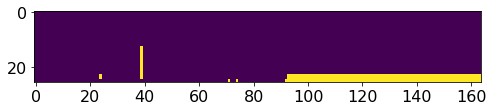

In [7]:
imshow(data.isnull().values.T)

### Lizard #39 ran away

In [8]:
data.iloc[39,:]

ID                     588
Hurricane            After
Origin            Pine Cay
Sex                   Male
SVL                  47.44
Femur                10.32
Tibia                 11.6
Metatarsal            7.73
LongestToe            6.66
Humerus                8.5
Radius                7.56
Metacarpal            2.35
LongestFinger         3.65
FingerCount            NaN
ToeCount               NaN
FingerArea1            NaN
FingerArea2            NaN
FingerArea3            NaN
ToeArea1               NaN
ToeArea2               NaN
ToeArea3               NaN
MeanFingerArea         NaN
MeanToeArea            NaN
SumFingers             NaN
SumToes                NaN
MaxFingerForce       0.274
Name: 39, dtype: object

### We are not interested in clustering based on missing values!  Drop data not needed!

In [9]:
# drop the one data point wth lots of NA
data = data.drop([39])

# only keep numercal body measurements
data_num = data.drop(['ID','Hurricane','Origin','Sex'],axis=1)  

# drop which was not measured
data_num = data_num.drop(['SumFingers','SumToes','MaxFingerForce'],axis=1)

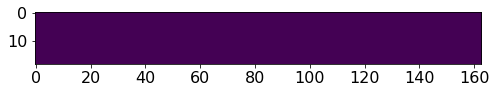

In [10]:
imshow(data_num.isnull().values.T)

### Perform PCA

In [11]:
# scale before PCA
X  = StandardScaler().fit_transform(data_num)

pca = PCA()
X_pca = pca.fit_transform(X)

---

## 2, PCA  
* B, Plot, and interpret the first 3 components using the descriptive labels ('Origin', 'Sex', 'Hurricane').



### Strong clustering in the 1st component

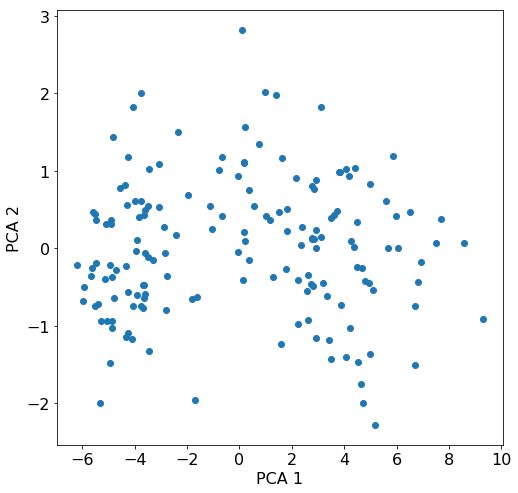

In [12]:
plot(X_pca[:,0],X_pca[:,1],'o')
xlabel('PCA 1')
ylabel('PCA 2')
show()

### Interpret components: Comp 1 is male-female ( of course )

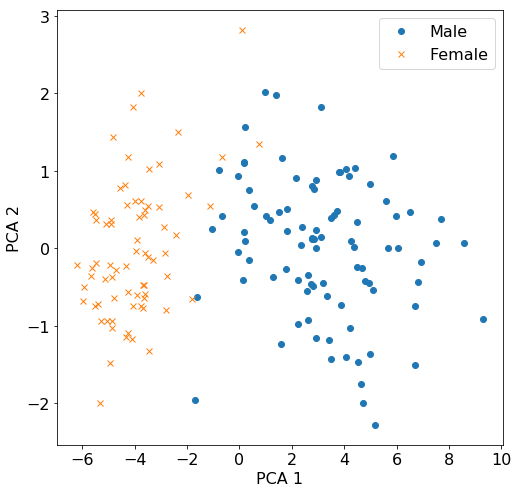

In [13]:
male_idx = data['Sex'] == 'Male'
plot(X_pca[male_idx,0],X_pca[male_idx,1],'o', label='Male')
plot(X_pca[~male_idx,0],X_pca[~male_idx,1],'x', label='Female')
xlabel('PCA 1')
ylabel('PCA 2')
legend()

### No obvious clustering in comp 2-3

Text(0,0.5,'PCA 3')

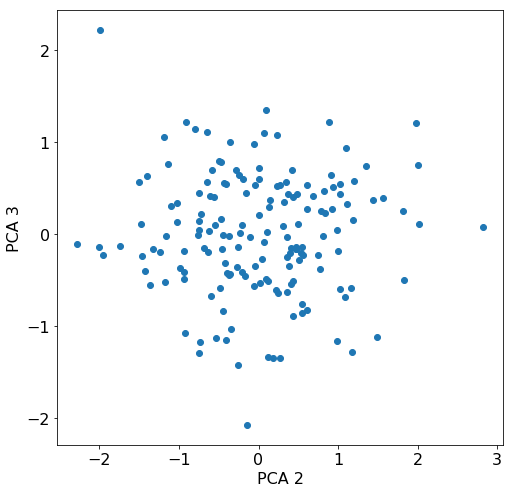

In [14]:
plot(X_pca[:,1],X_pca[:,2],'o')
xlabel('PCA 2')
ylabel('PCA 3')

### Check origin, nope

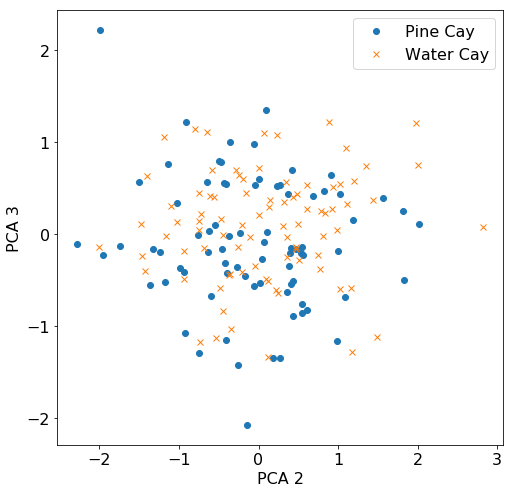

In [15]:
orig_idx = data['Origin'] == 'Pine Cay'
plot(X_pca[orig_idx,1],X_pca[orig_idx,2],'o', label='Pine Cay')
plot(X_pca[~orig_idx,1],X_pca[~orig_idx,2],'x', label='Water Cay')
xlabel('PCA 2')
ylabel('PCA 3')
legend()

### Check hurricane, bingo!

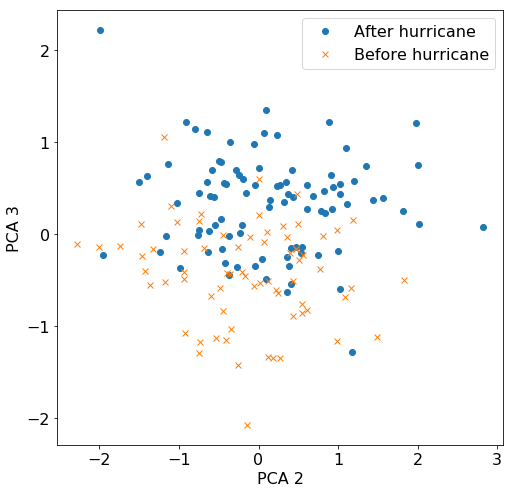

In [16]:
hurr_idx = data['Hurricane'] == 'After'
plot(X_pca[hurr_idx,1],X_pca[hurr_idx,2],'o', label='After hurricane')
plot(X_pca[~hurr_idx,1],X_pca[~hurr_idx,2],'x', label='Before hurricane')
xlabel('PCA 2')
ylabel('PCA 3')
legend()

### Check hurricane and sex, just to make sure

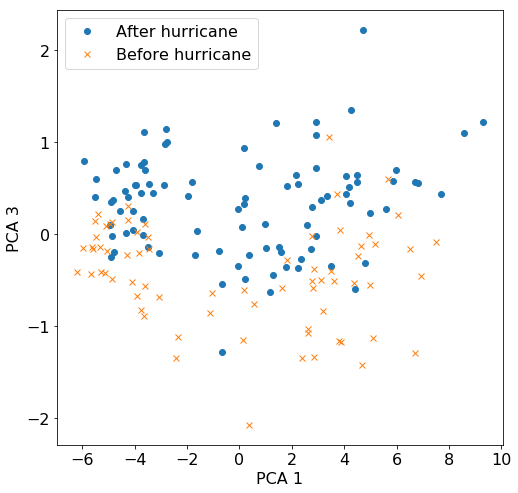

In [17]:
hurr_idx = data['Hurricane'] == 'After'
plot(X_pca[hurr_idx,0],X_pca[hurr_idx,2],'o', label='After hurricane')
plot(X_pca[~hurr_idx,0],X_pca[~hurr_idx,2],'x', label='Before hurricane')
xlabel('PCA 1')
ylabel('PCA 3')
legend()

----

## !!! Interpret component values:

---

### Sex component: males are simply larger

In [18]:
zip(data_num.columns,pca.components_[0])

[('SVL', 0.2396699068873259),
 ('Femur', 0.22787727077890135),
 ('Tibia', 0.23911059988009495),
 ('Metatarsal', 0.2366058325405837),
 ('LongestToe', 0.22661416394099954),
 ('Humerus', 0.23583888230278138),
 ('Radius', 0.24081352224425923),
 ('Metacarpal', 0.20109839039008381),
 ('LongestFinger', 0.22255726865127848),
 ('FingerCount', 0.17064296922266192),
 ('ToeCount', 0.17997059568328241),
 ('FingerArea1', 0.23971929539505535),
 ('FingerArea2', 0.23710651531690163),
 ('FingerArea3', 0.23914791932390145),
 ('ToeArea1', 0.24113144273838197),
 ('ToeArea2', 0.24130280317578753),
 ('ToeArea3', 0.24108709961903993),
 ('MeanFingerArea', 0.23949943955814071),
 ('MeanToeArea', 0.241448303304203)]

### 2nd component is a mostly related to finger counts?

In [19]:
zip(data_num.columns,pca.components_[1])

[('SVL', -0.1264116423487418),
 ('Femur', -0.087180321654185419),
 ('Tibia', -0.034287079581090056),
 ('Metatarsal', -0.017872575956949147),
 ('LongestToe', -0.079592633212735089),
 ('Humerus', -0.062324471858596381),
 ('Radius', -0.071317747466594902),
 ('Metacarpal', -0.003123450078838077),
 ('LongestFinger', 0.049457065395697442),
 ('FingerCount', 0.71832636566670749),
 ('ToeCount', 0.61730112255325165),
 ('FingerArea1', -0.0052252564903880914),
 ('FingerArea2', -0.03794270634308515),
 ('FingerArea3', -0.0039468185410039503),
 ('ToeArea1', -0.1220862932300881),
 ('ToeArea2', -0.11718960228925009),
 ('ToeArea3', -0.12297391062949543),
 ('MeanFingerArea', -0.015894230241668198),
 ('MeanToeArea', -0.12088714442673387)]

### Third component, ability to hold on for your life :) Larger finger area, smaller body.

In [20]:
zip(data_num.columns,pca.components_[2])

[('SVL', -0.10031708144735453),
 ('Femur', -0.34801099979186972),
 ('Tibia', -0.23757229624192613),
 ('Metatarsal', -0.28738164612456424),
 ('LongestToe', -0.3287004624442737),
 ('Humerus', -0.11076157225672248),
 ('Radius', -0.16281208805504277),
 ('Metacarpal', 0.0099190929537464369),
 ('LongestFinger', -0.1959173293427677),
 ('FingerCount', 0.1537247004016587),
 ('ToeCount', -0.20524728861177247),
 ('FingerArea1', 0.30879125133348778),
 ('FingerArea2', 0.34186501685373183),
 ('FingerArea3', 0.33016763335354538),
 ('ToeArea1', 0.11254794694959888),
 ('ToeArea2', 0.11285274974123567),
 ('ToeArea3', 0.10911972833480814),
 ('MeanFingerArea', 0.32822325347183928),
 ('MeanToeArea', 0.11163157253758042)]

---

## 3, T-SNE

* A, Perform T-SNE on meaningful lizard body measurement data. 
* B, Plot, and interpret the emerging clusters using the descriptive labels ('Origin', 'Sex', 'Hurricane'). 

Text(0,0.5,'T-SNE 2')

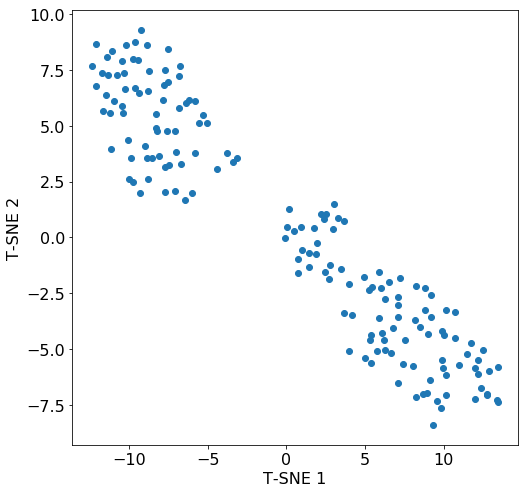

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X)
plot(X_tsne[:,0],X_tsne[:,1],'o')
xlabel('T-SNE 1')
ylabel('T-SNE 2')

### Interpret using sex

Text(0,0.5,'T-SNE 2')

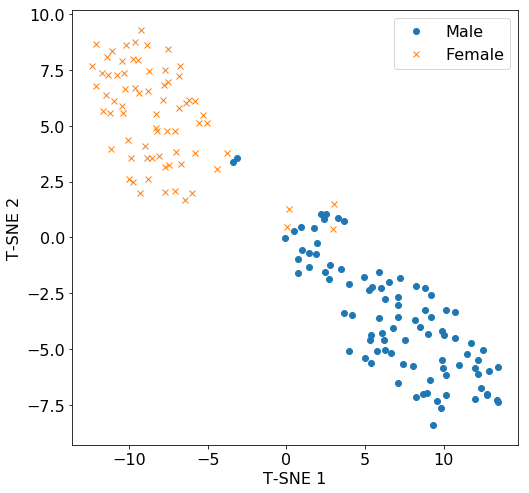

In [22]:
male_idx = data['Sex'] == 'Male'
plot(X_tsne[male_idx,0],X_tsne[male_idx,1],'o', label='Male')
plot(X_tsne[~male_idx,0],X_tsne[~male_idx,1],'x',label='Female')
legend()
xlabel('T-SNE 1')
ylabel('T-SNE 2')

###  Interpret using hurricane

Text(0,0.5,'T-SNE 2')

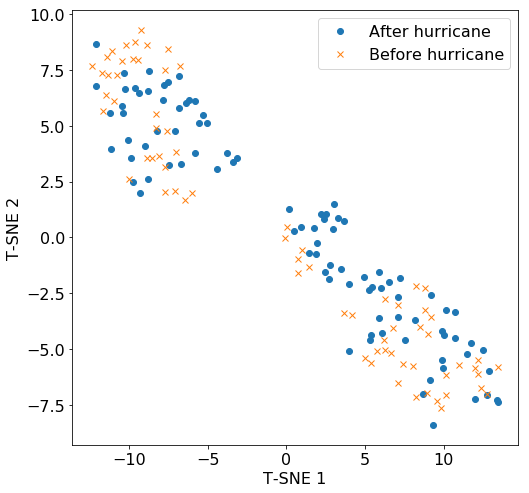

In [23]:
plot(X_tsne[hurr_idx,0],X_tsne[hurr_idx,1],'o', label='After hurricane')
plot(X_tsne[~hurr_idx,0],X_tsne[~hurr_idx,1],'x',label='Before hurricane')
legend()
xlabel('T-SNE 1')
ylabel('T-SNE 2')

### Interpret using origin

Text(0,0.5,'T-SNE 2')

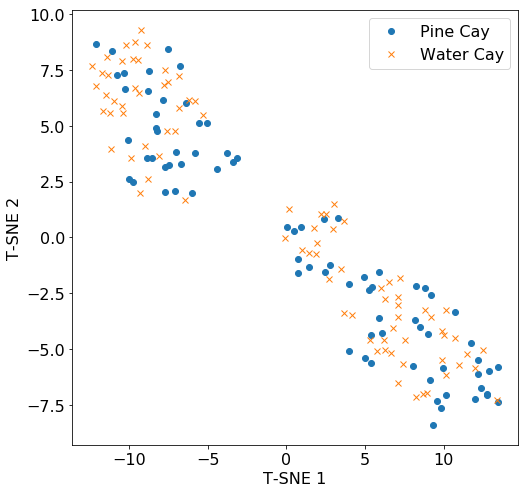

In [24]:
plot(X_tsne[orig_idx,0],X_tsne[orig_idx,1],'o', label='Pine Cay')
plot(X_tsne[~orig_idx,0],X_tsne[~orig_idx,1],'x', label='Water Cay')
legend()
xlabel('T-SNE 1')
ylabel('T-SNE 2')

## 3, T-SNE

* C, Repeat T-SNE 3 times using random seeds (0,1,2) and compare them visually. 

### TSNE is stochastic! 

Text(0,0.5,'T-SNE 2')

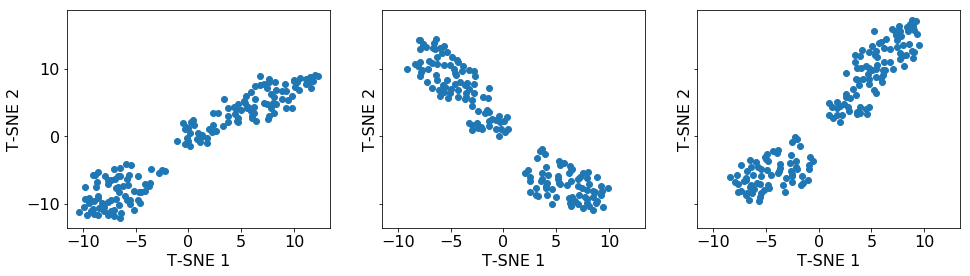

In [25]:
figsize(16,4)
f,a = subplots(1,3, figsize=(16,4), sharey=True, sharex=True)
tsne = TSNE(random_state=0)
X_tsne = tsne.fit_transform(X)
plt.sca(a[0])
plot(X_tsne[:,0],X_tsne[:,1],'o')
xlabel('T-SNE 1')
ylabel('T-SNE 2')

plt.sca(a[1])
tsne = TSNE(random_state=1)
X_tsne = tsne.fit_transform(X)
plot(X_tsne[:,0],X_tsne[:,1],'o')
xlabel('T-SNE 1')
ylabel('T-SNE 2')

plt.sca(a[2])
tsne = TSNE(random_state=2)
X_tsne = tsne.fit_transform(X)
plot(X_tsne[:,0],X_tsne[:,1],'o')
xlabel('T-SNE 1')
ylabel('T-SNE 2')

## 3, T-SNE

* D, Try T-SNE using 3 components too, do new clusters emerge which explain other descriptive labels?

### 3D T-SNE is rubbish here!

Text(0,0.5,'T-SNE 2')

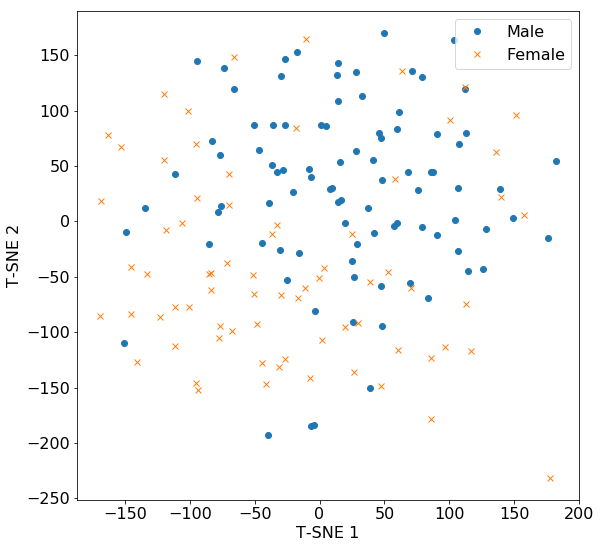

In [26]:
figsize(9,9)
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)
plot(X_tsne[male_idx,0],X_tsne[male_idx,1],'o', label='Male')
plot(X_tsne[~male_idx,0],X_tsne[~male_idx,1],'x',label='Female')
legend()
xlabel('T-SNE 1')
ylabel('T-SNE 2')

Text(0,0.5,'T-SNE 3')

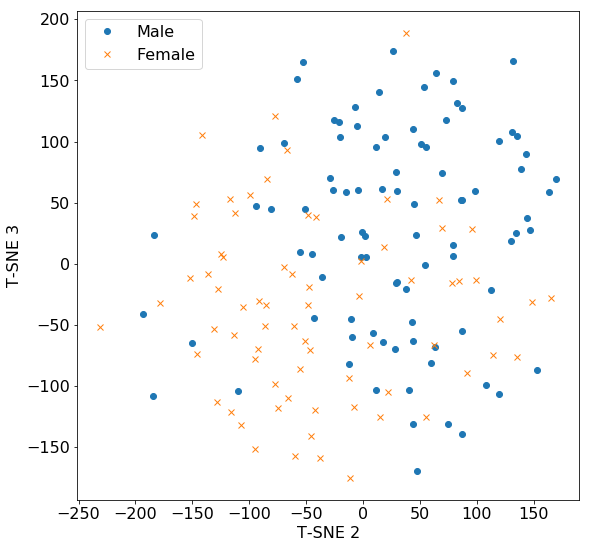

In [27]:
plot(X_tsne[male_idx,1],X_tsne[male_idx,2],'o', label='Male')
plot(X_tsne[~male_idx,1],X_tsne[~male_idx,2],'x',label='Female')
legend()
xlabel('T-SNE 2')
ylabel('T-SNE 3')

### TSNE does not show hurricane even in 3 dimensions

Text(0,0.5,'T-SNE 3')

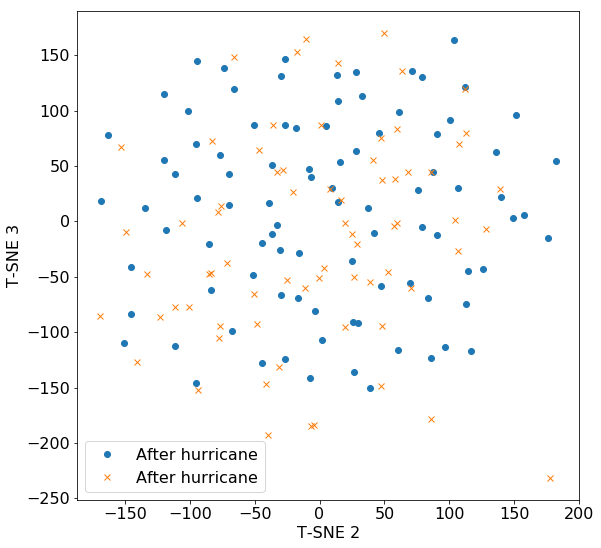

In [28]:
plot(X_tsne[hurr_idx,0],X_tsne[hurr_idx,1],'o', label='After hurricane')
plot(X_tsne[~hurr_idx,0],X_tsne[~hurr_idx,1],'x',label='After hurricane')
legend()
xlabel('T-SNE 2')
ylabel('T-SNE 3')

Text(0,0.5,'T-SNE 3')

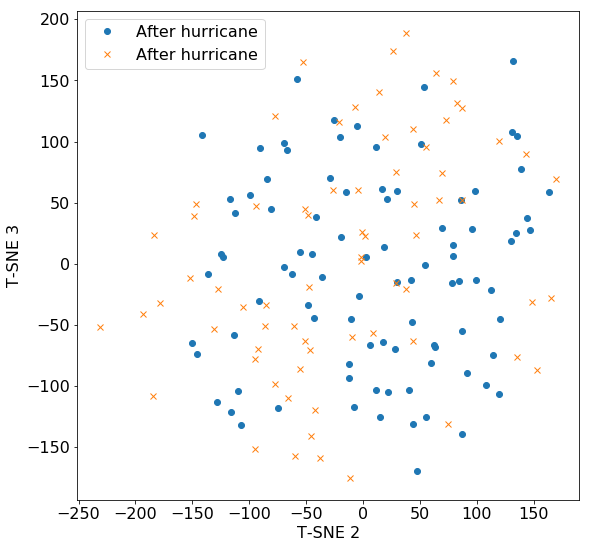

In [29]:
plot(X_tsne[hurr_idx,1],X_tsne[hurr_idx,2],'o', label='After hurricane')
plot(X_tsne[~hurr_idx,1],X_tsne[~hurr_idx,2],'x',label='After hurricane')
legend()
xlabel('T-SNE 2')
ylabel('T-SNE 3')

## 4, K-means
* A, Perform K-means clustering on meaningful lizard body measurement data with 2 clusters. 
* B, Interpret the clusters using the descriptive labels ('Origin', 'Sex', 'Hurricane'). 

### Naturally 2 cluster yields male/female

In [30]:
kmeans = KMeans(n_clusters=2)
acc = (male_idx.astype('int')==kmeans.fit_predict(X)).astype('int').mean()
if acc<0.5:
    acc = 1 -acc

print 'K-means correctly categorized gender: %.3f'%acc

K-means correctly categorized gender: 0.957


## 4, K-means
* C, Repeat A and B in the 2D T-SNE embedding space.

### K-means dpends on the embeddig, and the T-SNE one is slightly more accurate!

In [31]:
kmeans = KMeans(n_clusters=2)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
acc = (male_idx.astype('int')==kmeans.fit_predict(X_tsne)).astype('int').mean()
if acc<0.5:
    acc = 1 -acc

print 'K-means correctly categorized gender: %.3f'%acc

K-means correctly categorized gender: 0.963


## 4, K-means

* D, Perform K-means clustering on the original data with 3 and 4 clusters. Assess visually the meaning of clusters in the 2D space of the 1st and 3rd PCA component. What is the relationship between the clusters and the descriptive labels? 

### More K-MEANS cluster do not reveal new meaningful clusters!
- We could wish for something like: like (male before hurricane, male after hurricane, female before hurricane, female after hurricane 
- Bu NO, it just divided male/female to 3 new clusters: female, male, macho male 

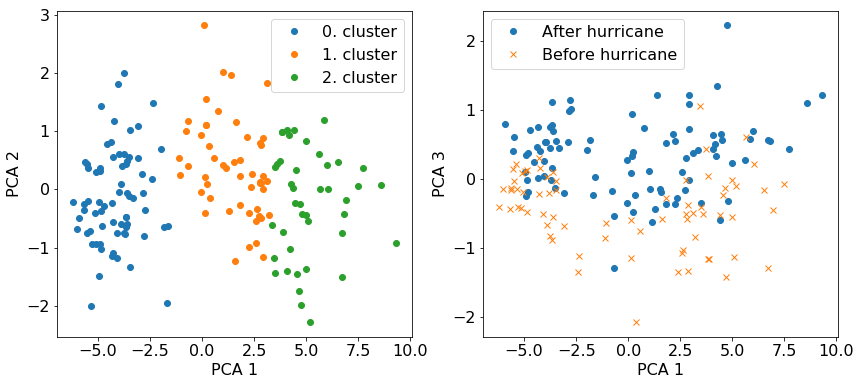

In [32]:
kmeans = KMeans(n_clusters=3)
x_kmeans = kmeans.fit_predict(X)

figsize(14,6)
subplot(1,2,1)
hurr_idx = data['Hurricane'] == 'After'
for i in [0,1,2]:
    plot(X_pca[x_kmeans==i,0],X_pca[x_kmeans==i,1],'o', label=str(i)+'. cluster')
xlabel('PCA 1')
ylabel('PCA 2')
legend()


subplot(1,2,2)
plot(X_pca[hurr_idx,0],X_pca[hurr_idx,2],'o', label='After hurricane')
plot(X_pca[~hurr_idx,0],X_pca[~hurr_idx,2],'x', label='Before hurricane')
xlabel('PCA 1')
ylabel('PCA 3')
legend()

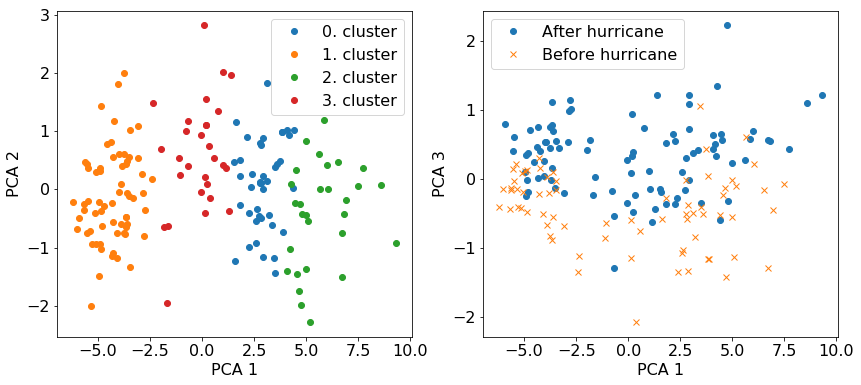

In [33]:
kmeans = KMeans(n_clusters=4)
x_kmeans = kmeans.fit_predict(X)

figsize(14,6)
subplot(1,2,1)
hurr_idx = data['Hurricane'] == 'After'
for i in [0,1,2,3]:
    plot(X_pca[x_kmeans==i,0],X_pca[x_kmeans==i,1],'o', label=str(i)+'. cluster')
xlabel('PCA 1')
ylabel('PCA 2')
legend()


subplot(1,2,2)
plot(X_pca[hurr_idx,0],X_pca[hurr_idx,2],'o', label='After hurricane')
plot(X_pca[~hurr_idx,0],X_pca[~hurr_idx,2],'x', label='Before hurricane')
xlabel('PCA 1')
ylabel('PCA 3')
legend()

## 5, Hierarchical clustering
* A, Perform hierarchical clustering on meaningful lizard body measurement data. Show the results on a dendrogram.


### It is super easy with seaborn, and we get column clusters too, and some nice heatmap.

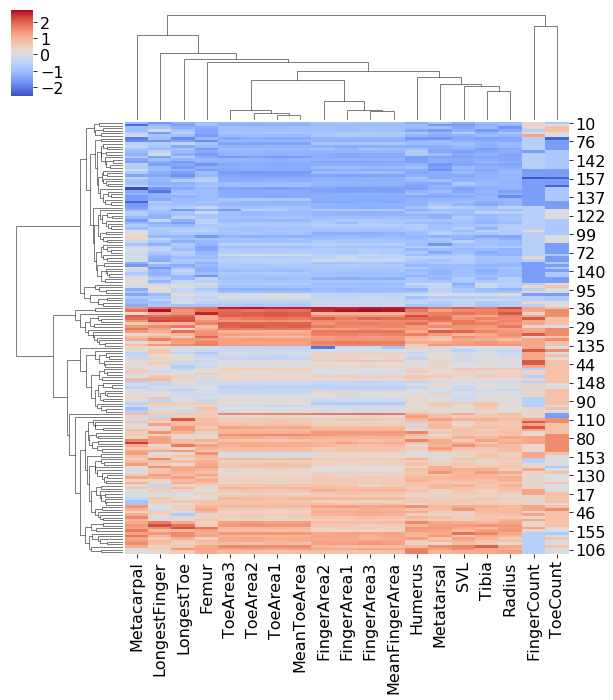

In [34]:
sns.clustermap(data_num, z_score=1, cmap='coolwarm')

## 5, Hierarchical clustering
* B, Interpret the dendrogram using the descriptive labels ('Origin', 'Sex', 'Hurricane').

### The 2 largest clusters are male female, but other descriptive labels do not seem to mean anything on the dendrogram.


Male is black

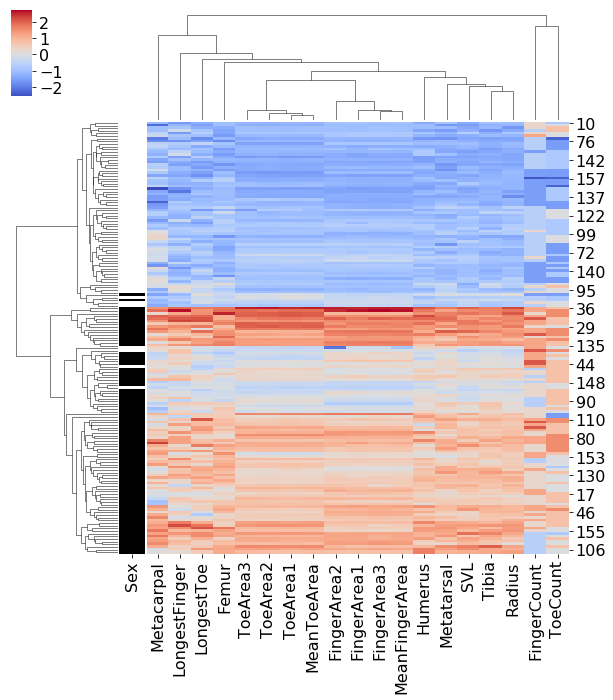

In [35]:
lut = dict(zip(['Male','Female'], "kw"))
rc = data['Sex'].map(lut)
sns.clustermap(data_num, cmap='coolwarm', row_colors=rc, z_score=1)

Pine Cay is black

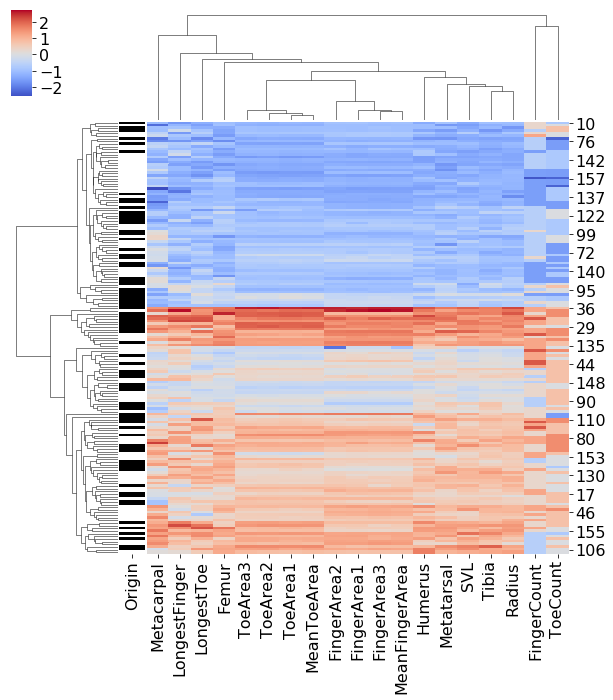

In [36]:
lut = dict(zip(['Pine Cay', 'Water Cay'], "kw"))
rc = data['Origin'].map(lut)
sns.clustermap(data_num, cmap='coolwarm', row_colors=rc, z_score=1)

After hurricane is black

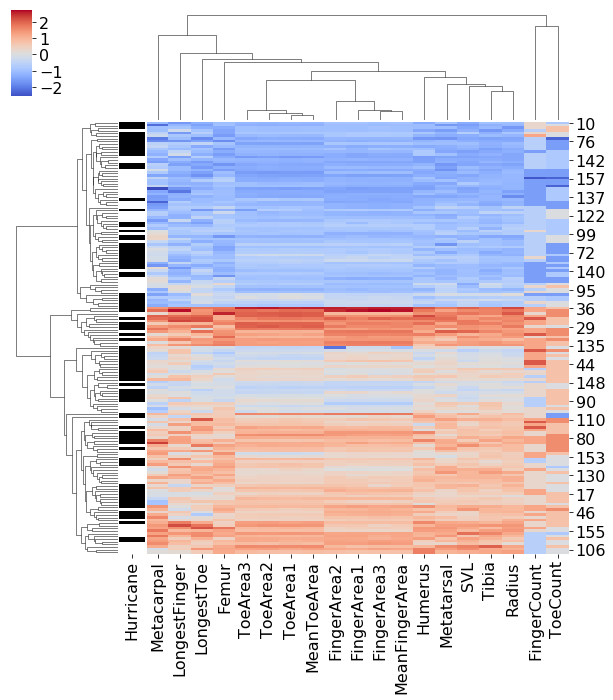

In [37]:
lut = dict(zip(['After','Before'], 'kw' ))
rc = data['Hurricane'].map(lut)
sns.clustermap(data_num, cmap='coolwarm', row_colors=rc, z_score=1)